# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [18]:
# import libraries here
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

employee = pd.read_csv('Employee.csv')
temp_states = pd.read_csv('Temp_States.csv')
orders = pd.read_csv('Orders.csv')

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [2]:
# your answer here
temp = temp_states

#### Print `temp`

In [3]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [4]:
# your answer here
temp.dtypes

# We got that both City and State columns have types object (strings) and temperatures are float numbers.

City            object
State           object
Temperature    float64
dtype: object

#### Select the rows where state is New York

In [5]:
# your answer here
temp[temp['State'] == 'New York']

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [6]:
# your answer here
ny_mean_temp = temp[temp['State'] == 'New York'].Temperature.mean()
ny_mean_temp


10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [7]:
# your answer here
above_15 = temp[temp['Temperature'] > 15]
above_15


,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [8]:
# your answer here
above_15['City']

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [9]:
# your answer here
above = temp['Temperature'] > 15
below = temp['Temperature'] < 20

temp[(above & below)]


,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [10]:
# your answer here
list_states = list(set([temp['State'][i] for i in range(len(temp['State']))]))

for state in list_states:
    print(f" The mean temperature in {state} is: {temp[temp['State'] == state].Temperature.mean()}.")
    print(f" The standard deviation is: {temp[temp['State'] == state].Temperature.std()}.")

 The mean temperature in Connecticut is: 15.833333333333332.
 The standard deviation is: 1.9641855032959645.
 The mean temperature in New Jersey is: 21.11111111111111.
 The standard deviation is: 1.5713484026367717.
 The mean temperature in New York is: 10.74074074074074.
 The standard deviation is: 8.133404168888054.


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [11]:
# your answer here
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Explore the data types of the Temp dataframe. Comment your results

In [12]:
# your answer here
employee.dtypes

# Most variables are categoric in a form of string; name, department, education, gender and title.
# There are two variables, years of experience and salary (in k), that are numeric, in integers

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

<AxesSubplot: xlabel='Gender', ylabel='Count'>

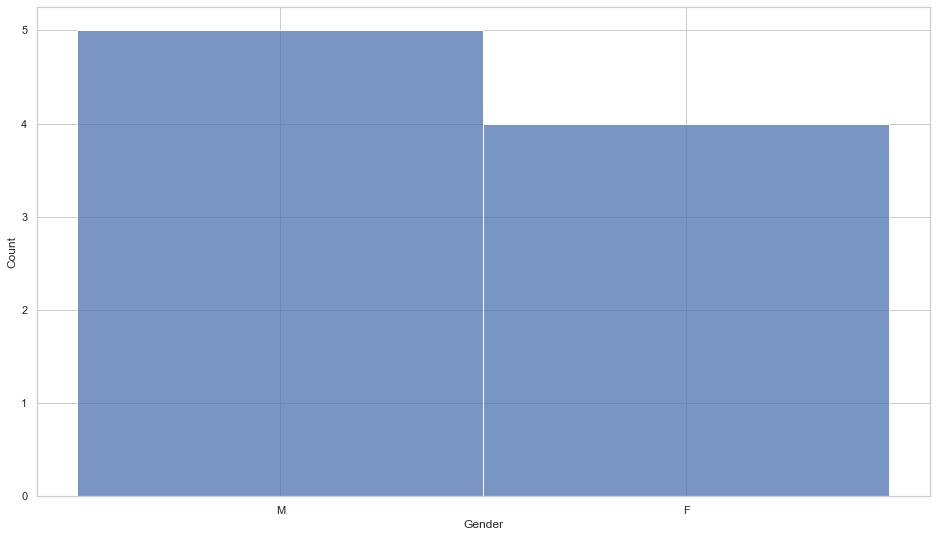

In [23]:
sns.histplot(data=employee, x='Gender')
# There are more men than women.

<AxesSubplot: xlabel='Title', ylabel='Count'>

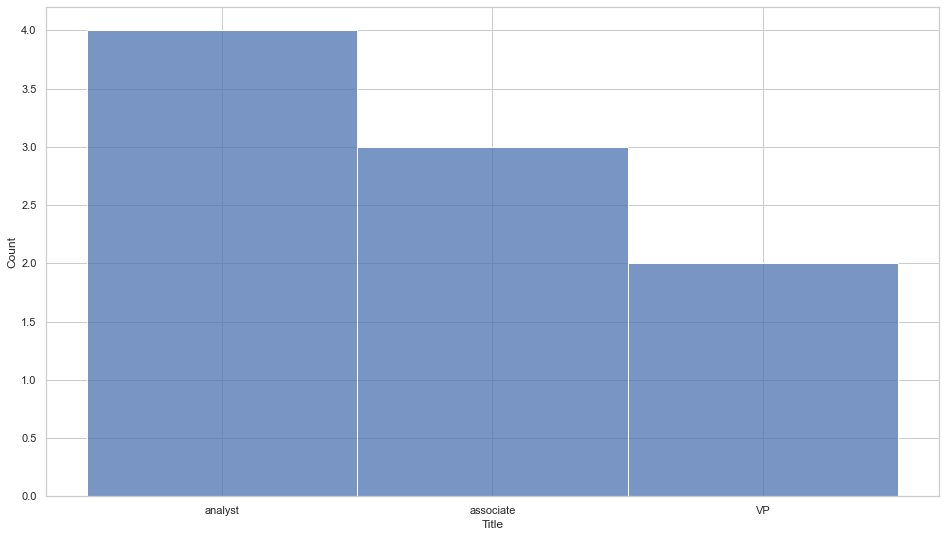

In [24]:
sns.histplot(data=employee, x='Title')
# The majoritary title is analyst, followed by associate and VP.

<AxesSubplot: xlabel='Years', ylabel='Count'>

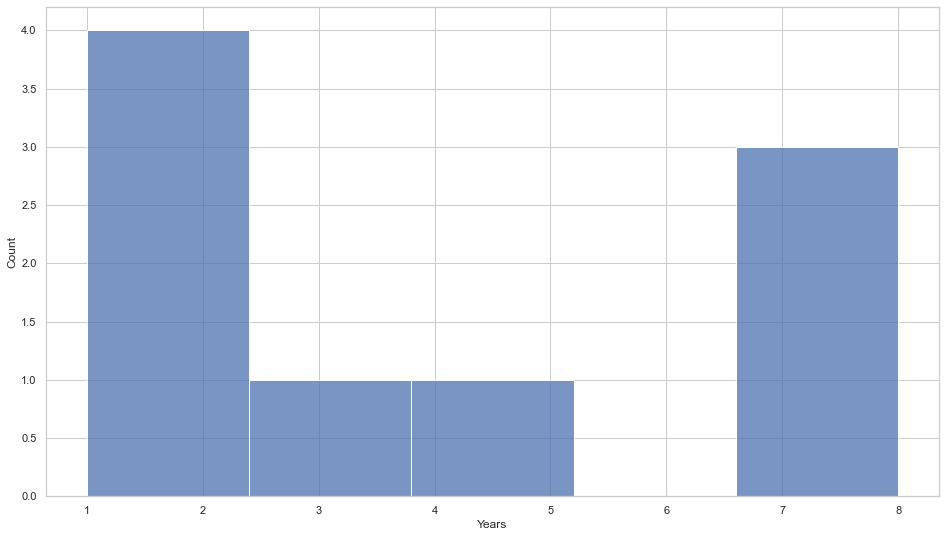

In [25]:
sns.histplot(data=employee, x='Years')
# Most employees are recent entries or consolidated profiles. Employees with a range within are not that much.

<AxesSubplot: xlabel='Salary', ylabel='Count'>

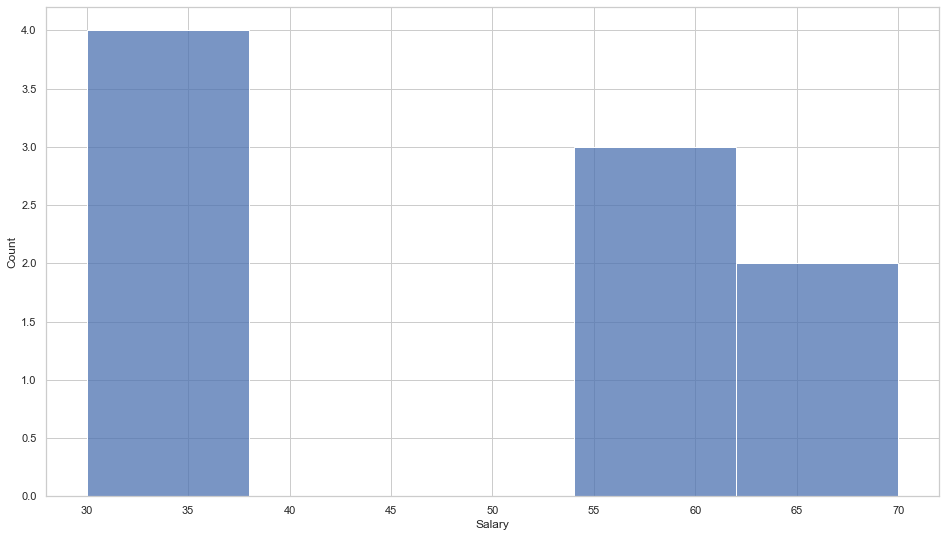

In [26]:
sns.histplot(data=employee, x='Salary')
# Salaries are move around two different ranges: 30-38 and 54-70


<AxesSubplot: xlabel='Education', ylabel='Count'>

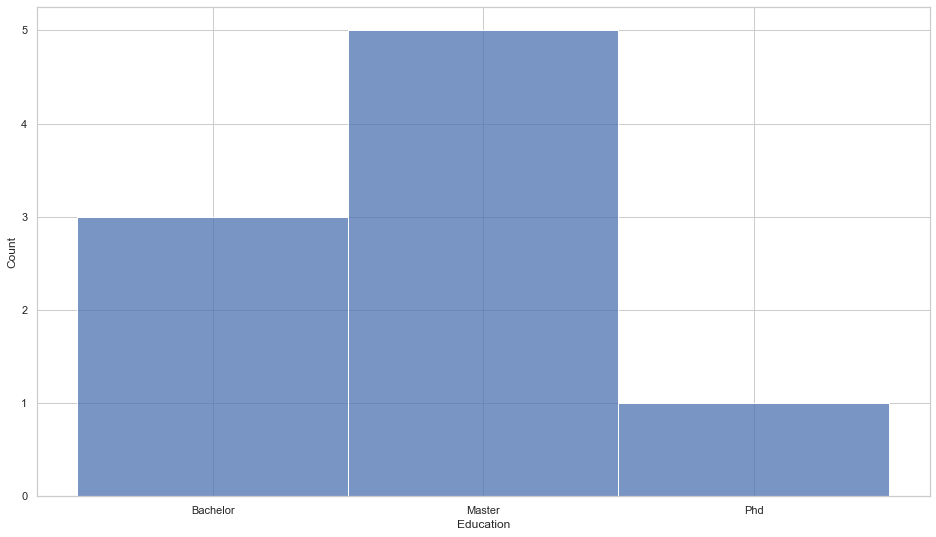

In [22]:
sns.histplot(data=employee, x='Education')
# The most common education level is a master. Bachelor follows and there is a single doctor.

<AxesSubplot: xlabel='Name', ylabel='Count'>

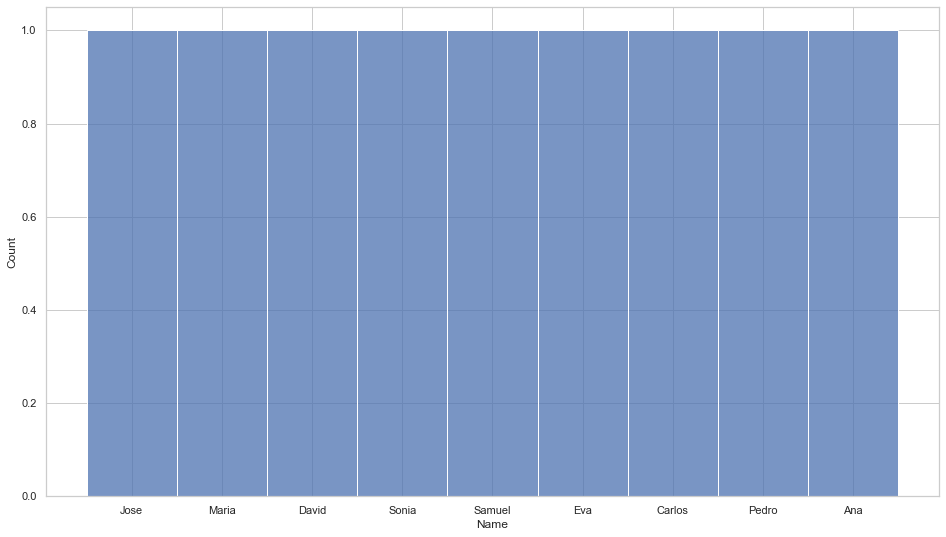

In [20]:
# your answer here
sns.histplot(data=employee, x='Name')
# There are no repeated names among employees.

<AxesSubplot: xlabel='Department', ylabel='Count'>

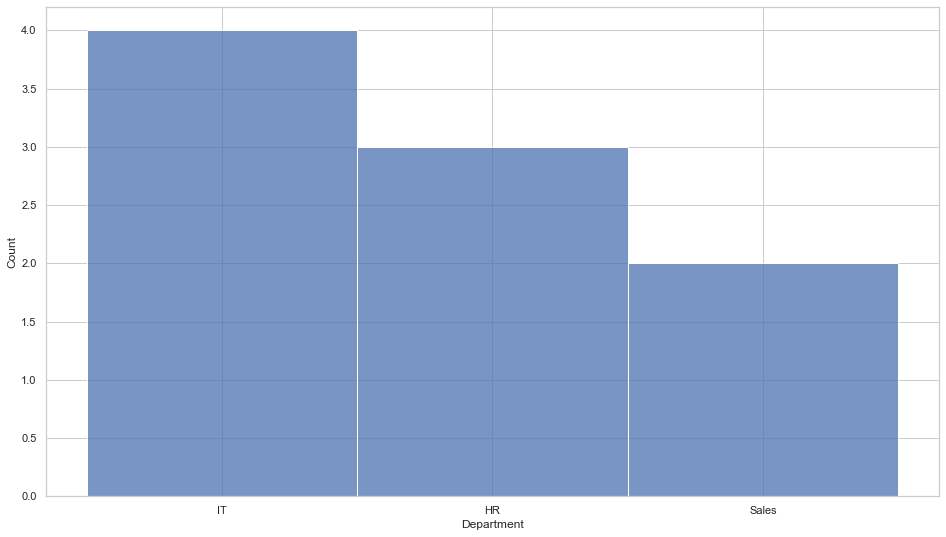

In [27]:
sns.histplot(data=employee, x='Department')
# The department with most employees is IT, followed by HR and Sales.

#### What's the average salary in this company?

In [29]:
# your answer here
employee.Salary.mean()

48.888888888888886

#### What's the highest salary?

In [30]:
# your answer here
employee.Salary.max()

70

#### What's the lowest salary?

In [31]:
# your answer here
employee.Salary.min()

30

#### Who are the employees with the lowest salary?

In [37]:
# your answer here
employee[employee['Salary'] == employee.Salary.min()].Name

1    Maria
2    David
Name: Name, dtype: object

#### Could you give all the information about an employee called David?

In [32]:
# your answer here
employee[employee['Name'] == 'David']

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [35]:
# your answer here
employee[employee['Name'] == 'David'].Salary

2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [39]:
# your answer here
employee[employee['Title'] == 'associate']

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [40]:
# your answer here- 1 method
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [41]:
# your answer here- 2nd method
employee.iloc[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [44]:
# your answer here
associate = employee['Title'] == 'associate'
salary = employee['Salary'] > 55

employee[(associate & salary)]

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [56]:
# your answer here
employee.groupby(['Years'])['Salary'].mean()

Years
1    35.000000
2    38.333333
3    55.000000
4    35.000000
7    60.000000
8    70.000000
Name: Salary, dtype: float64

####  What is the average Salary per title?

In [57]:
# your answer here
employee.groupby(['Title'])['Salary'].mean()

Title
VP           70.000000
analyst      32.500000
associate    56.666667
Name: Salary, dtype: float64

#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

<AxesSubplot: >

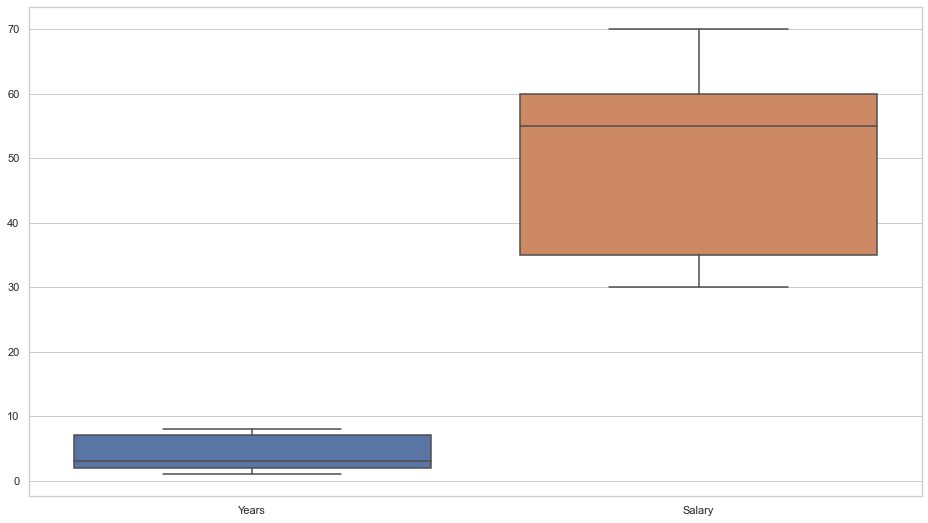

In [58]:
# draw boxplot here
sns.boxplot(data=employee)

In [62]:
# print first quartile here
print(f'For years, 1st quantile is {employee["Years"].quantile(0.25)}')
print(f'For salary, 1st quantile is {employee["Salary"].quantile(0.25)}')

For years, 1st quantile is 2.0
For salary, 1st quantile is 35.0


In [61]:
# print third quartile here
print(f'For years, 3rd quantile is {employee["Years"].quantile(0.75)}')
print(f'For salary, 3rd quantile is {employee["Salary"].quantile(0.75)}')

For years, 3rd quantile is 7.0
For salary, 3rd quantile is 60.0


#### Is the mean salary per gender different?

In [67]:
# your answer here
employee.groupby(['Gender'])['Salary'].mean()

# The average salary is 2.5 points higher for male than for female.

Gender
F    47.5
M    50.0
Name: Salary, dtype: float64

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [72]:
# your answer here
mean_values = employee.groupby(['Department'])['Years', 'Salary'].mean()
mean_values

/var/folders/lr/stnkft6j5ps6pysrw7v0cgp80000gn/T/ipykernel_62082/3389021293.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mean_values = employee.groupby(['Department'])['Years', 'Salary'].mean()


,Years,Salary
Department,,
HR,4.666667,45.00
IT,4.500000,48.75
Sales,2.500000,55.00


In [73]:
max_values = employee.groupby(['Department'])['Years', 'Salary'].max()
max_values

/var/folders/lr/stnkft6j5ps6pysrw7v0cgp80000gn/T/ipykernel_62082/3031944085.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  max_values = employee.groupby(['Department'])['Years', 'Salary'].max()


,Years,Salary
Department,,
HR,8,70
IT,8,70
Sales,3,55


In [78]:
min_values = employee.groupby(['Department'])['Years', 'Salary'].min()
min_values

/var/folders/lr/stnkft6j5ps6pysrw7v0cgp80000gn/T/ipykernel_62082/3323476048.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  min_values = employee.groupby(['Department'])['Years', 'Salary'].min()


,Years,Salary
Department,,
HR,2,30
IT,1,30
Sales,2,55


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [85]:
# your answer here
employee.groupby(['Department'])['Salary'].apply(lambda x: x.max() - x.min())

Department
HR       40
IT       40
Sales     0
Name: Salary, dtype: int64

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [88]:
# your answer here
orders = orders

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [91]:
# your answer here
orders.dtypes
# The data types are mostly numeric, e.g. time variables, quantities and prices. There are a few categoric variables such 
# as StockCode and description, giving some insights about orders. All data allows to get a full picture of orders.

Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

In [92]:
# your answer here
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    397924 non-null  int64  
 1   InvoiceNo     397924 non-null  int64  
 2   StockCode     397924 non-null  object 
 3   year          397924 non-null  int64  
 4   month         397924 non-null  int64  
 5   day           397924 non-null  int64  
 6   hour          397924 non-null  int64  
 7   Description   397924 non-null  object 
 8   Quantity      397924 non-null  int64  
 9   InvoiceDate   397924 non-null  object 
 10  UnitPrice     397924 non-null  float64
 11  CustomerID    397924 non-null  int64  
 12  Country       397924 non-null  object 
 13  amount_spent  397924 non-null  float64
dtypes: float64(2), int64(8), object(4)
memory usage: 42.5+ MB


In [93]:
orders.describe()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


####  What is the average Purchase Price?

In [94]:
# your answer here
orders['amount_spent'].mean()

22.394748504739596

#### What were the highest and lowest purchase prices? 

In [95]:
# your answer here
orders['amount_spent'].min()

0.0

In [96]:
# your answer here
orders['amount_spent'].max()

168469.6

#### Select all the customers we have in Spain

In [103]:
# your answer here
spain_customers = list(set(list(orders[orders['Country'] == 'Spain']['CustomerID'])))
print(spain_customers)

[12544, 12545, 12417, 12547, 12548, 12421, 12550, 12551, 12546, 12556, 12557, 12442, 12445, 12448, 12450, 12454, 12455, 12462, 12596, 12597, 12354, 12484, 17097, 12502, 12507, 12510, 12538, 12539, 12540, 12541]


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [106]:
# your answer here
print(f'There are {len(spain_customers)} customers in Spain.')

There are 30 customers in Spain.


#### Select all the customers who have bought more than 50 items ?

In [112]:
# your answer here
more_than_50_items = list(orders[orders['Quantity'] > 50]['CustomerID'])
print(more_than_50_items[:10])

[13748, 15291, 14688, 14688, 16029, 16029, 16029, 16029, 16029, 16029]


#### Select orders from Spain that are above 50 items

In [114]:
# your answer here
spain = orders['Country'] == 'Spain'
high_quantities = orders['Quantity'] > 50

orders[(spain & high_quantities)].head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.0
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0


#### Select all free orders

In [118]:
# your answer here
orders[orders['UnitPrice'] == 0].head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [120]:
# your answer here

orders[orders['Description'].str.contains('lunch bag')].head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [122]:
# your answer here
lunch_bag = orders['Description'].str.contains('lunch bag')
eleven = orders['year'] == 2011

orders[(lunch_bag & eleven)].head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
26513,42852,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
26860,43616,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65


#### Show the frequency distribution of the amount spent in Spain.

<AxesSubplot: xlabel='amount_spent', ylabel='Count'>

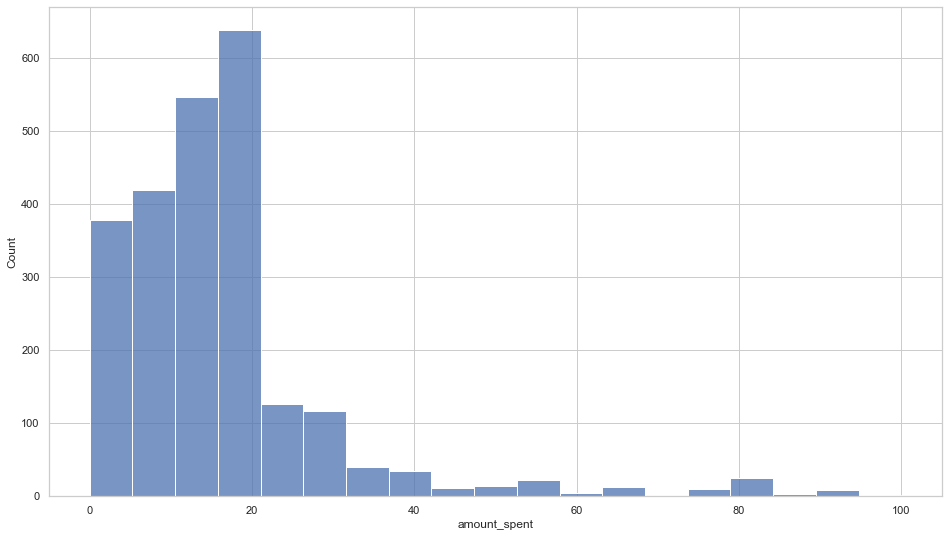

In [133]:
# your answer here
spain_orders = orders[orders['Country'] == 'Spain']
sns.histplot(data = spain_orders, x = 'amount_spent', bins=np.linspace(0,100,20))

# some outliers that we did not take into account!

#### Select all orders made in the month of August

In [136]:
# your answer here
orders[orders['month'] == 8].head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [140]:
# your answer here
orders[orders['month'] == 8]['Country'].value_counts()

United Kingdom     23105
Germany              795
EIRE                 593
France               569
Netherlands          280
Switzerland          267
Spain                252
Belgium              194
Israel               171
Channel Islands      140
Australia            107
Italy                 95
Austria               88
Norway                77
Finland               61
Malta                 55
Portugal              41
Sweden                40
Unspecified           23
Iceland               22
Poland                17
Denmark               16
Canada                 5
Name: Country, dtype: int64

#### What's the  average amount of money spent by country

In [141]:
# your answer here
orders.groupby(['Country'])['amount_spent'].mean()

Country
Australia               116.895620
Austria                  25.624824
Bahrain                  32.258824
Belgium                  20.283772
Brazil                   35.737500
Canada                   24.280662
Channel Islands          27.340160
Cyprus                   22.134169
Czech Republic           33.069600
Denmark                  49.882474
EIRE                     36.687745
European Community       21.670833
Finland                  32.913985
France                   25.056827
Germany                  25.311562
Greece                   32.831172
Iceland                  23.681319
Israel                   29.119718
Italy                    23.064960
Japan                   116.561900
Lebanon                  37.641778
Lithuania                47.458857
Malta                    24.335625
Netherlands             120.798282
Norway                   33.736418
Poland                   22.226212
Portugal                 22.872702
RSA                      17.281207
Saudi Arabia

#### What's the most expensive item?

In [142]:
# your answer here
orders[orders['UnitPrice'] == orders['UnitPrice'].max()]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
118352,173382,551697,POST,2011,5,2,13,postage,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom,8142.75


#### What was the average amount spent per year ?

In [143]:
# your answer here
orders.groupby(['year'])['amount_spent'].mean()

year
2010    21.892733
2011    22.430074
Name: amount_spent, dtype: float64